<a href="https://colab.research.google.com/github/Tom-Jung/testttttt/blob/main/Network_with_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install basemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 72.1 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.0
    Uninstalling pyproj-3.7.0:
      Successfully uninstalled pyproj-3.7.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2


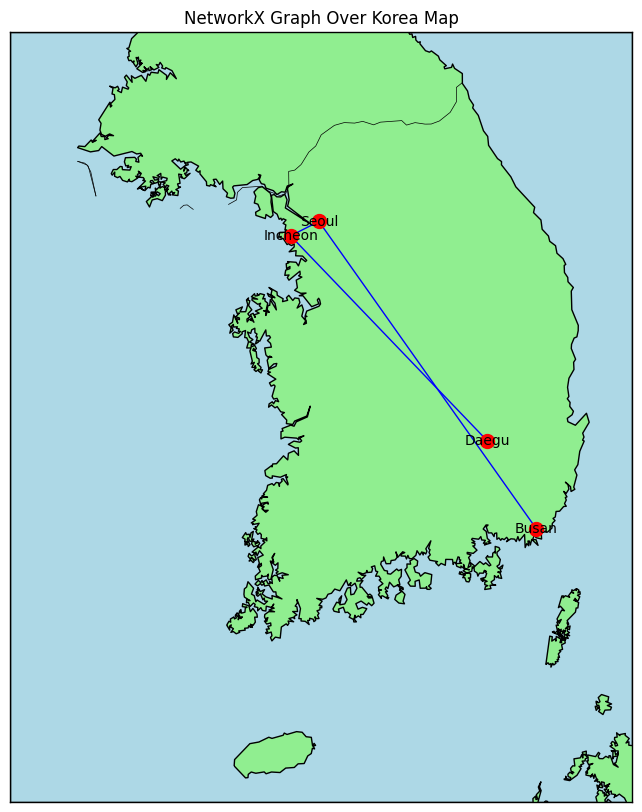

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Step 1: Create a map of Korea
plt.figure(figsize=(10, 10))
korea_map = Basemap(
    projection='merc',
    llcrnrlon=124, llcrnrlat=33, urcrnrlon=130, urcrnrlat=39,
    resolution='i'
)
korea_map.drawcoastlines()
korea_map.drawcountries()
korea_map.drawmapboundary(fill_color='lightblue')
korea_map.fillcontinents(color='lightgreen', lake_color='lightblue')

# Step 2: Define a NetworkX graph with nodes and edges
G = nx.Graph()
nodes = {
    "Seoul": (126.9780, 37.5665),
    "Busan": (129.0756, 35.1796),
    "Incheon": (126.7052, 37.4563),
    "Daegu": (128.6014, 35.8714),
}
edges = [("Seoul", "Busan"), ("Seoul", "Incheon"), ("Incheon", "Daegu")]

# Add nodes to the graph
for city, coord in nodes.items():
    G.add_node(city, pos=coord)

# Add edges to the graph
G.add_edges_from(edges)

# Step 3: Overlay the NetworkX graph on the map
positions = {city: korea_map(*coord) for city, coord in nodes.items()}

# Draw nodes
nx.draw_networkx_nodes(G, pos=positions, node_size=100, node_color="red")

# Draw edges
nx.draw_networkx_edges(G, pos=positions, edge_color="blue")

# Draw labels
nx.draw_networkx_labels(G, pos=positions, font_size=10, font_color="black")

plt.title("NetworkX Graph Over Korea Map")
plt.show()


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
# The following line imports the Basemap class after installation.
from mpl_toolkits.basemap import Basemap


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

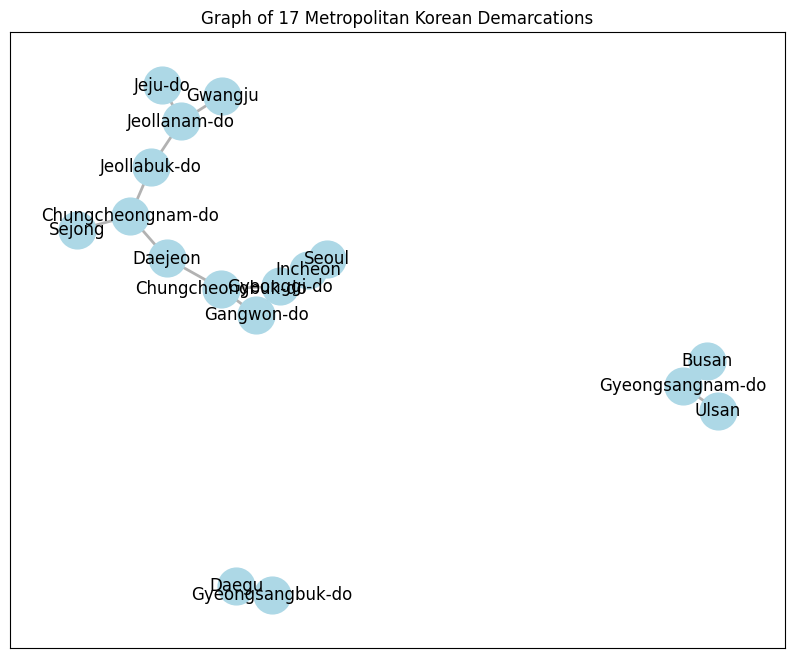

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a Graph
G = nx.Graph()

# List of 17 metropolitan Korean demarcations
metropolitan_areas = [
    "Seoul", "Busan", "Daegu", "Incheon", "Gwangju", "Daejeon", "Ulsan",
    "Sejong", "Gyeonggi-do", "Gangwon-do", "Chungcheongbuk-do",
    "Chungcheongnam-do", "Jeollabuk-do", "Jeollanam-do", "Gyeongsangbuk-do",
    "Gyeongsangnam-do", "Jeju-do"
]

# Add nodes to the graph
G.add_nodes_from(metropolitan_areas)

# Define edges (for example, adjacency or connections between areas)
# This is an arbitrary example. Replace it with actual adjacency data if needed.
edges = [
    ("Seoul", "Incheon"), ("Seoul", "Gyeonggi-do"), ("Busan", "Gyeongsangnam-do"),
    ("Daegu", "Gyeongsangbuk-do"), ("Incheon", "Gyeonggi-do"), ("Gwangju", "Jeollanam-do"),
    ("Daejeon", "Chungcheongnam-do"), ("Daejeon", "Chungcheongbuk-do"),
    ("Ulsan", "Gyeongsangnam-do"), ("Sejong", "Chungcheongnam-do"),
    ("Chungcheongbuk-do", "Gyeonggi-do"), ("Gangwon-do", "Gyeonggi-do"),
    ("Gangwon-do", "Chungcheongbuk-do"), ("Jeollabuk-do", "Chungcheongnam-do"),
    ("Jeollanam-do", "Jeollabuk-do"), ("Jeju-do", "Jeollanam-do")
]

# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightblue")
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, alpha=0.6, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

# Show the graph
plt.title("Graph of 17 Metropolitan Korean Demarcations")
plt.show()

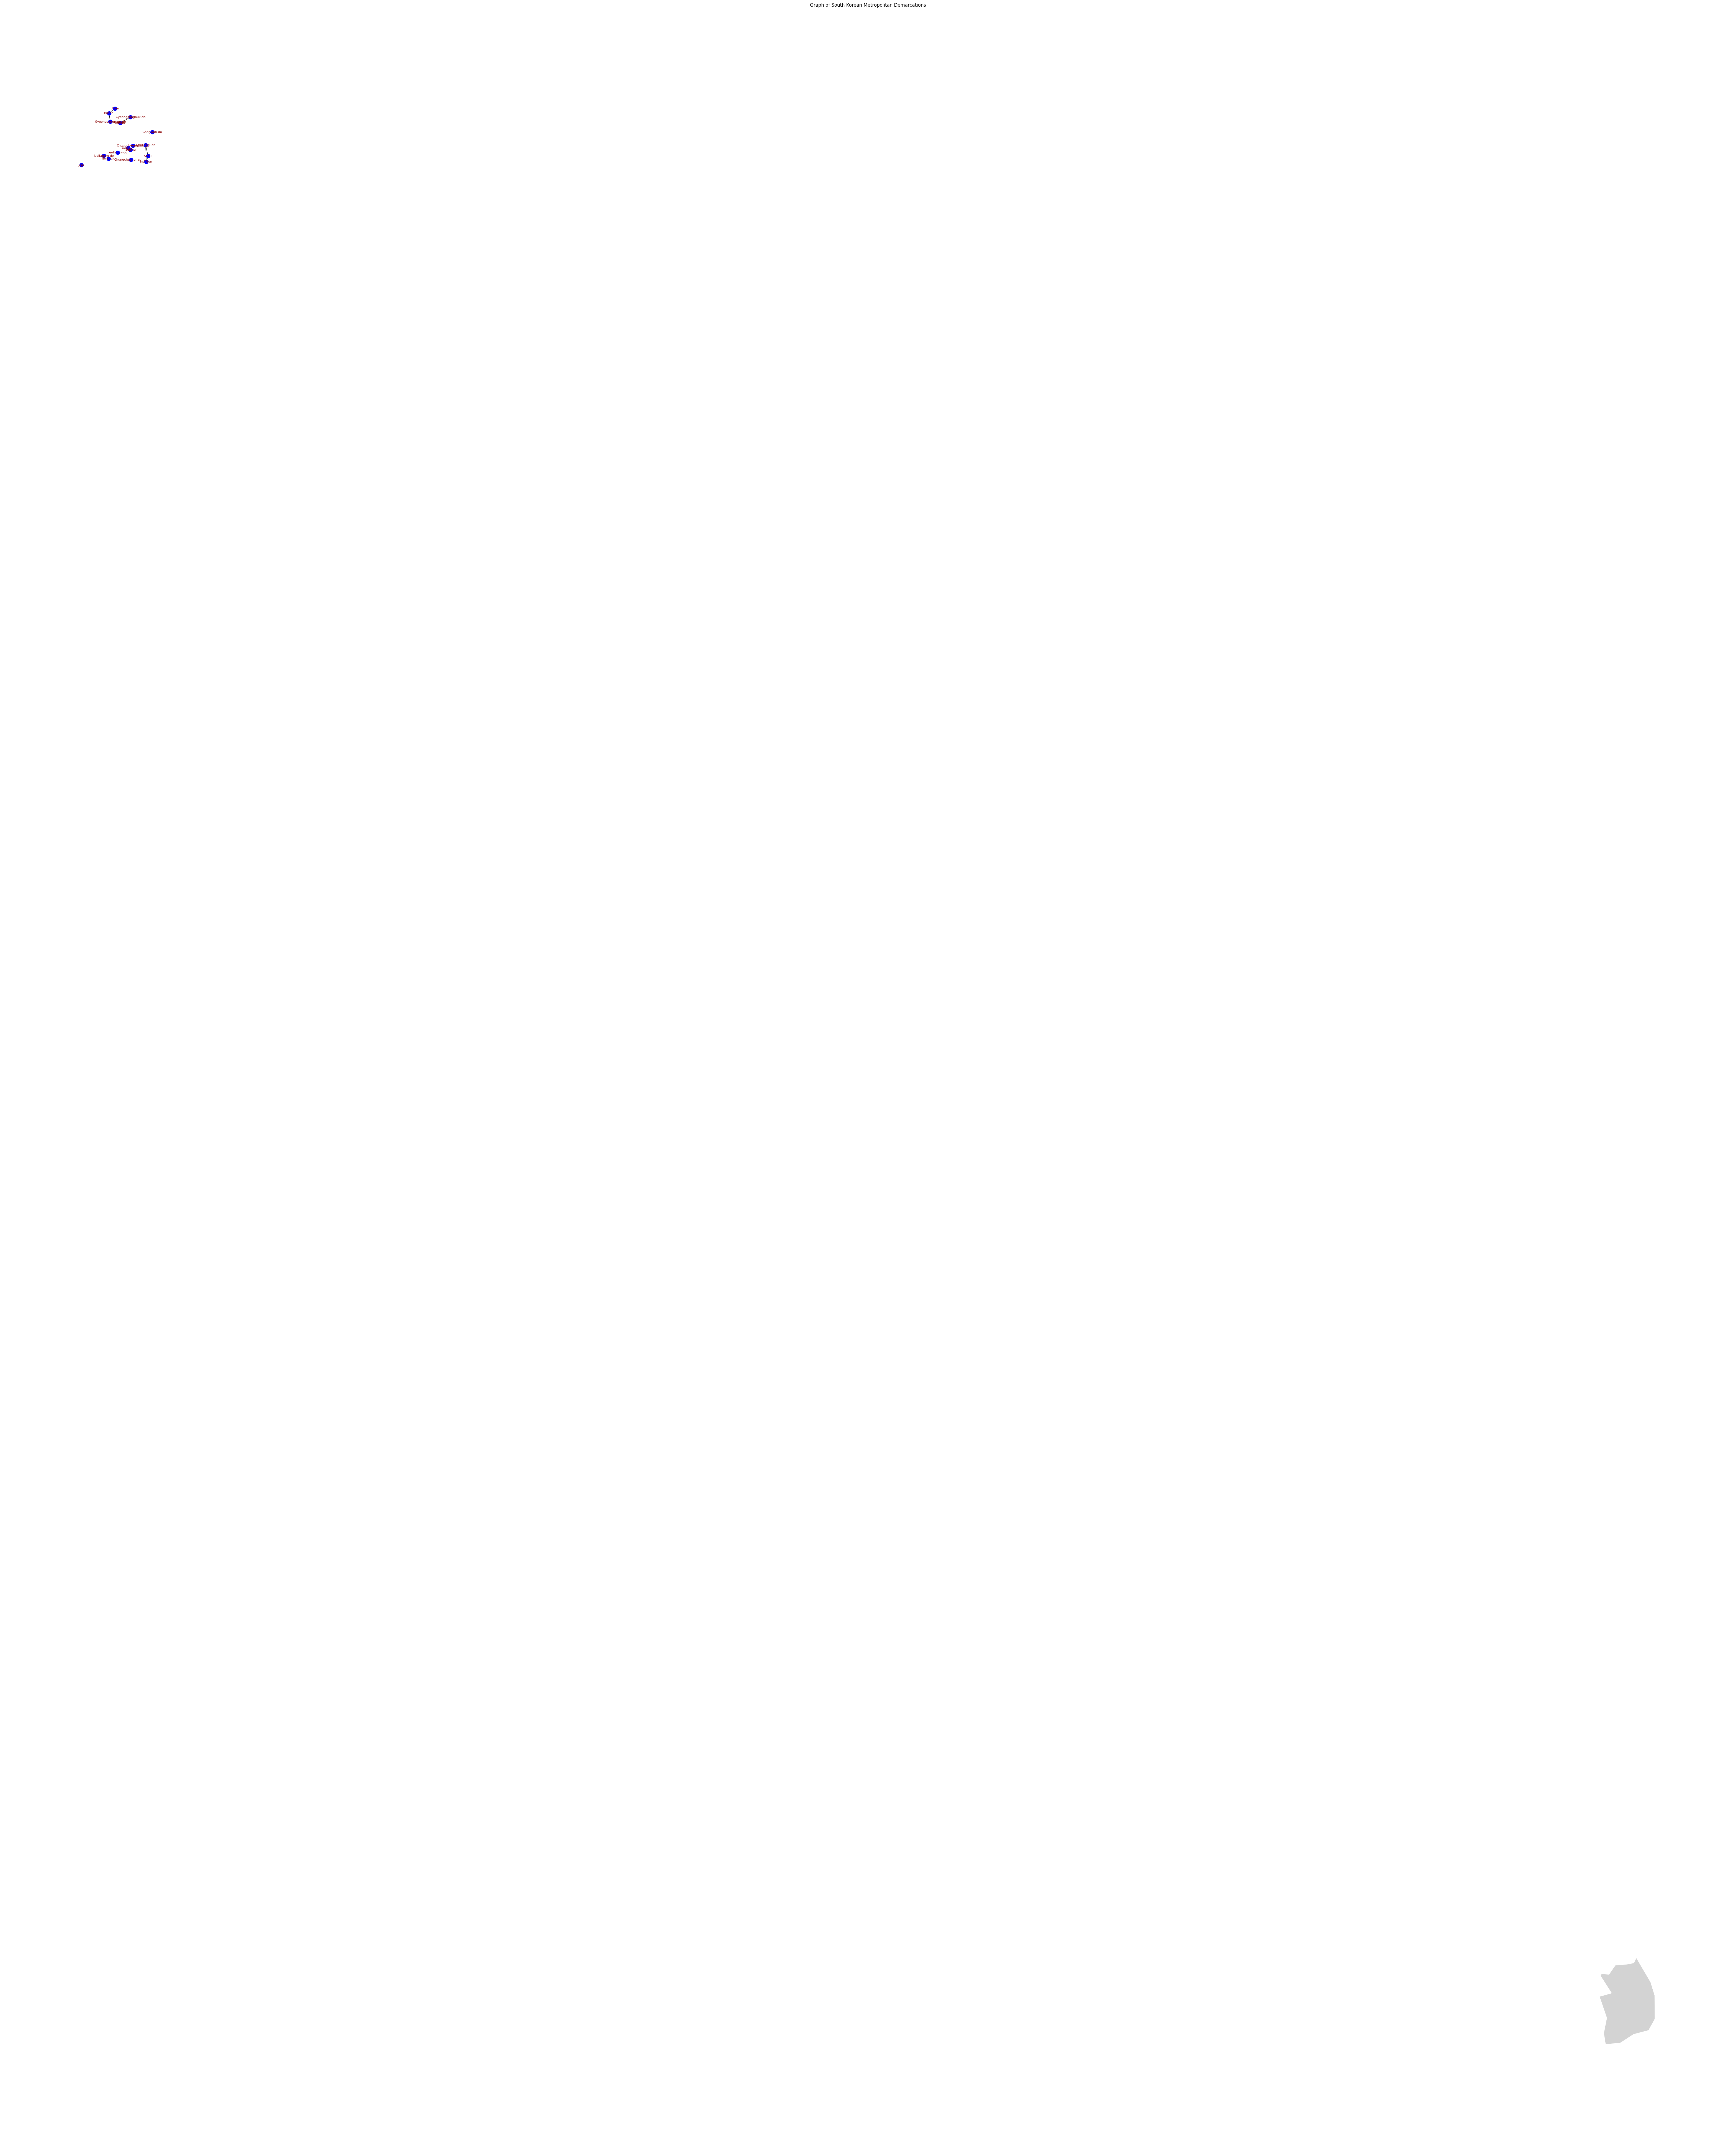

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')  # Replace with the actual path
south_korea = world[world['ADMIN'] == 'South Korea']

# Define nodes (17 metropolitan areas in South Korea)
nodes = {
    "Seoul": (37.5665, 126.9780),
    "Busan": (35.1796, 129.0756),
    "Daegu": (35.8714, 128.6014),
    "Incheon": (37.4563, 126.7052),
    "Gwangju": (35.1595, 126.8526),
    "Daejeon": (36.3504, 127.3845),
    "Ulsan": (35.5384, 129.3114),
    "Sejong": (36.4875, 127.2818),
    "Gyeonggi-do": (37.4138, 127.5183),
    "Gangwon-do": (37.8228, 128.1555),
    "Chungcheongbuk-do": (36.6350, 127.4914),
    "Chungcheongnam-do": (36.5184, 126.8000),
    "Jeollabuk-do": (35.7175, 127.1530),
    "Jeollanam-do": (34.8679, 126.9910),
    "Gyeongsangbuk-do": (36.4919, 128.8889),
    "Gyeongsangnam-do": (35.2599, 128.6649),
    "Jeju": (33.4996, 126.5312),
}

# Create a graph
G = nx.Graph()

# Add nodes with positions
for city, coords in nodes.items():
    G.add_node(city, pos=coords)

# Example edges based on adjacency
edges = [
    ("Seoul", "Incheon"),
    ("Seoul", "Gyeonggi-do"),
    ("Incheon", "Gyeonggi-do"),
    ("Busan", "Ulsan"),
    ("Busan", "Gyeongsangnam-do"),
    ("Daegu", "Gyeongsangbuk-do"),
    # Add other edges here...
]

G.add_edges_from(edges)

# Extract positions for plotting
positions = nx.get_node_attributes(G, 'pos')

# Load map data (use GeoPandas for South Korea map)
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')  # Replace with the actual path
south_korea = world[world['ADMIN'] == 'South Korea']

# Plot map
fig, ax = plt.subplots(figsize=(100, 100))
south_korea.plot(ax=ax, color='lightgrey')

# Draw the graph
nx.draw(
    G, pos=positions, ax=ax,
    node_size=100, node_color='blue', edge_color='black',
    with_labels=True, font_size=8, font_color='darkred'
)

plt.title("Graph of South Korean Metropolitan Demarcations")
plt.show()

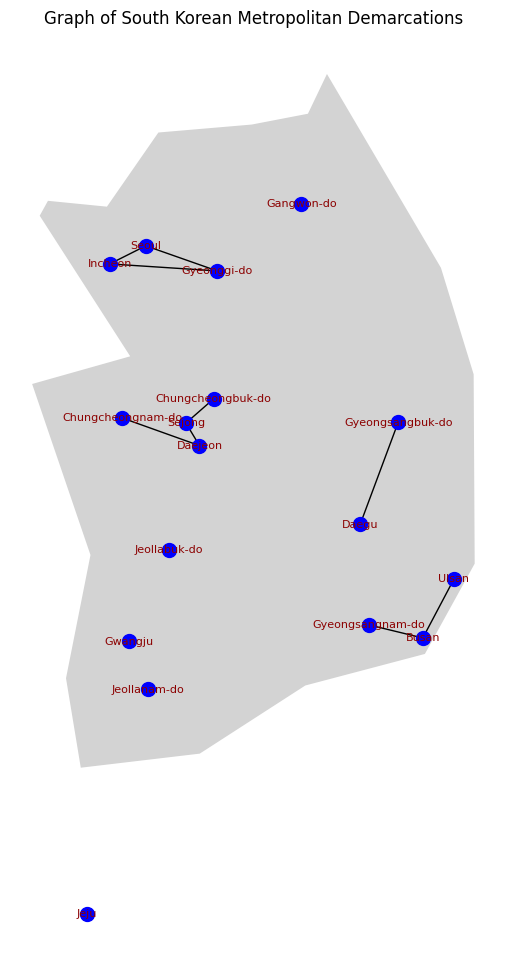

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd

# Define the path to the shapefile
shapefile_path = '/mnt/data/ne_110m_admin_0_countries.shp'  # Replace with your actual path

# Load the world map and extract South Korea
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')  # Replace with the actual path
south_korea = world[world['ADMIN'] == 'South Korea']

# Define nodes (17 metropolitan areas in South Korea)
nodes = {
    "Seoul": (37.5665, 126.9780),
    "Busan": (35.1796, 129.0756),
    "Daegu": (35.8714, 128.6014),
    "Incheon": (37.4563, 126.7052),
    "Gwangju": (35.1595, 126.8526),
    "Daejeon": (36.3504, 127.3845),
    "Ulsan": (35.5384, 129.3114),
    "Sejong": (36.4875, 127.2818),
    "Gyeonggi-do": (37.4138, 127.5183),
    "Gangwon-do": (37.8228, 128.1555),
    "Chungcheongbuk-do": (36.6350, 127.4914),
    "Chungcheongnam-do": (36.5184, 126.8000),
    "Jeollabuk-do": (35.7175, 127.1530),
    "Jeollanam-do": (34.8679, 126.9910),
    "Gyeongsangbuk-do": (36.4919, 128.8889),
    "Gyeongsangnam-do": (35.2599, 128.6649),
    "Jeju": (33.4996, 126.5312),
}

# Create a graph and add nodes with positions
G = nx.Graph()
for city, coords in nodes.items():
    G.add_node(city, pos=(coords[1], coords[0]))  # Swap lat/lon to match map projection

# Example edges based on adjacency
edges = [
    ("Seoul", "Incheon"),
    ("Seoul", "Gyeonggi-do"),
    ("Incheon", "Gyeonggi-do"),
    ("Busan", "Ulsan"),
    ("Busan", "Gyeongsangnam-do"),
    ("Daegu", "Gyeongsangbuk-do"),
    ("Daejeon", "Chungcheongnam-do"),
    ("Daejeon", "Sejong"),
    ("Sejong", "Chungcheongbuk-do"),
]

G.add_edges_from(edges)

# Extract positions for plotting
positions = nx.get_node_attributes(G, 'pos')

# Plot map and graph
fig, ax = plt.subplots(figsize=(12, 12))
south_korea.plot(ax=ax, color='lightgrey')

# Draw the graph
nx.draw(
    G, pos=positions, ax=ax,
    node_size=100, node_color='blue', edge_color='black',
    with_labels=True, font_size=8, font_color='darkred'
)

plt.title("Graph of South Korean Metropolitan Demarcations")
plt.show()


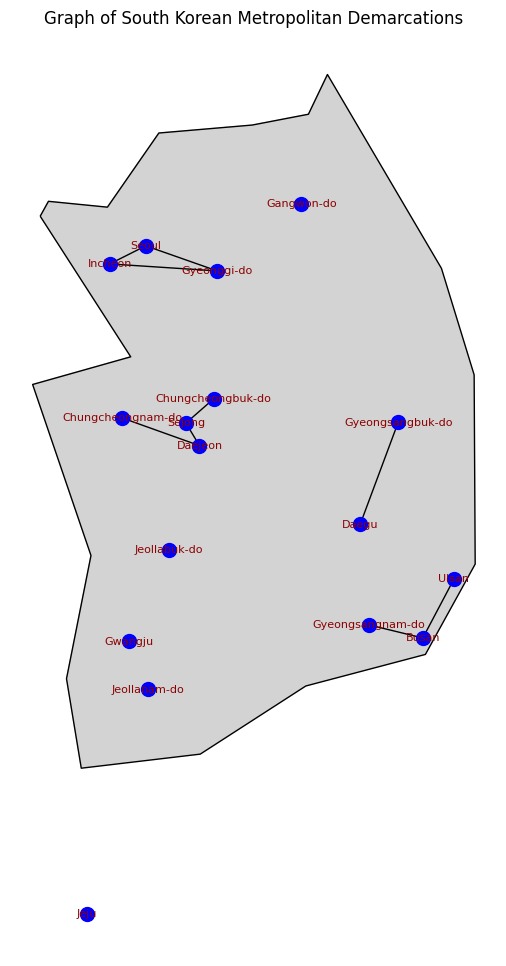

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd

# Define the path to the shapefile
shapefile_path = '/mnt/data/ne_110m_admin_0_countries.shp'  # Replace with your actual path

# Load the world map and extract South Korea
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')  # Replace with the actual path
south_korea = world[world['ADMIN'] == 'South Korea']

# Define nodes (17 metropolitan areas in South Korea)
nodes = {
    "Seoul": (37.5665, 126.9780),
    "Busan": (35.1796, 129.0756),
    "Daegu": (35.8714, 128.6014),
    "Incheon": (37.4563, 126.7052),
    "Gwangju": (35.1595, 126.8526),
    "Daejeon": (36.3504, 127.3845),
    "Ulsan": (35.5384, 129.3114),
    "Sejong": (36.4875, 127.2818),
    "Gyeonggi-do": (37.4138, 127.5183),
    "Gangwon-do": (37.8228, 128.1555),
    "Chungcheongbuk-do": (36.6350, 127.4914),
    "Chungcheongnam-do": (36.5184, 126.8000),
    "Jeollabuk-do": (35.7175, 127.1530),
    "Jeollanam-do": (34.8679, 126.9910),
    "Gyeongsangbuk-do": (36.4919, 128.8889),
    "Gyeongsangnam-do": (35.2599, 128.6649),
    "Jeju": (33.4996, 126.5312),
}

# Create a graph and add nodes with positions
G = nx.Graph()
for city, coords in nodes.items():
    G.add_node(city, pos=(coords[1], coords[0]))  # Swap lat/lon to match map projection

# Example edges based on adjacency
edges = [
    ("Seoul", "Incheon"),
    ("Seoul", "Gyeonggi-do"),
    ("Incheon", "Gyeonggi-do"),
    ("Busan", "Ulsan"),
    ("Busan", "Gyeongsangnam-do"),
    ("Daegu", "Gyeongsangbuk-do"),
    ("Daejeon", "Chungcheongnam-do"),
    ("Daejeon", "Sejong"),
    ("Sejong", "Chungcheongbuk-do"),
]

G.add_edges_from(edges)

# Extract positions for plotting
positions = nx.get_node_attributes(G, 'pos')

# Plot map and graph
fig, ax = plt.subplots(figsize=(12, 12))
south_korea.plot(ax=ax, color='lightgrey')  # Plot South Korea map
south_korea.plot(ax=ax, color='lightgrey', edgecolor='black')

# Draw the graph
nx.draw(
    G, pos=positions, ax=ax,
    node_size=100, node_color='blue', edge_color='black',
    with_labels=True, font_size=8, font_color='darkred'
)

plt.title("Graph of South Korean Metropolitan Demarcations")
plt.show()
